In [1]:
import numpy as np
import sys
sys.path.append("../src")
import matplotlib.pyplot as plt

In [2]:
from scipy.integrate import solve_ivp
import nevh
#PI = 3.141592653589793
PI = np.pi

# Hamiltonian function
def H(t, s, k, m):
    x, p = s
    return 0.5 * k * x**2 + 0.5 * p**2 / m

# Initial state: off equilibrium position, at rest (x=1, p=0)
initial_state = [1.0, 0.0]
# Discretization step parameters for numerical derivatives
ds = [0.1, 0.1]
# Hamiltonian parameters. With k=4\pi^2, m=1, the period is 1
kc = 4 * PI**2
mc = 1.0

# Create the Hrhs object, use scipy.solve_ivp to
G = nevh.HGrad(H, ds, k=kc, m=mc)

# solve Halmilton's eqs numerically from t=0 to t=3
trj = solve_ivp(G, [0.0, 3.0], initial_state)

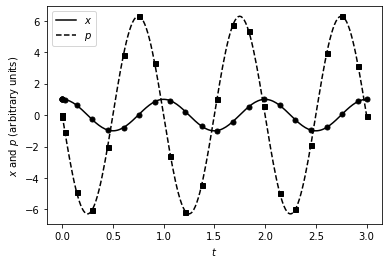

In [18]:
t_n = trj.t
ti=t_n[0]; tf=t_n[-1]
x_n, p_n = trj.y
x0 = x_n[0]
p0 = p_n[0]
wc = (kc/mc)**0.5
plt.plot(t_n, x_n, 'ko', t_n, p_n, 'ks', markersize=5)   # Plot of x and p
# Compare with analytical solution
A = (x0**2 + (p0/(mc*wc))**2)**0.5
phi = np.arctan(-p0/(x0*mc*wc))
t_an = np.linspace(ti,tf,200)
x_an = A * np.cos(wc*t_an + phi)
p_an = -mc*wc*A * np.sin(wc*t_an + phi)
plt.plot(t_an,x_an,'k',   label=r'$x$')
plt.plot(t_an,p_an,'k--', label=r"$p$")
plt.xlabel(r'$t$')
plt.ylabel(r'$x$ and $p$ (arbitrary units)')
plt.legend()
plt.savefig("shm.png", bbox_inches='tight',dpi=300);
plt.show();

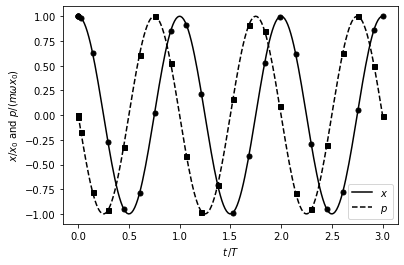

In [19]:
xt = x0
pt = mc * wc * x0
tt = 2 * PI / wc
plt.plot(t_an/tt, x_an/xt,'k'  , label=r'$x$');
plt.plot(t_an/tt, p_an/pt,'k--', label=r'$p$');
plt.plot(t_n/tt, x_n/xt, 'ko', t_n/tt, p_n/pt, 'ks', markersize=5);
plt.ylabel(r'$x/x_0$ and $p/(m\omega x_0)$')
plt.xlabel(r'$t\,/T$')
plt.legend();
plt.savefig("shm.png", bbox_inches='tight',dpi=300);
plt.show();